In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = r"F:\Xai_traderx\data\processed\reliance_processed.csv"
df = pd.read_csv(file_path)

In [3]:
df.head()

,Date,Close,High,Low,Open,Volume,Close_Return_1D,Close_Return_3D,Return,High_Low_Spread,...,bb_upper,bb_lower,bb_width,Bollinger_%B,bear_score,bull_strength,bear_strength,Momentum,Volatility,next_close
0,2020-07-15,845.291199,907.083664,824.204808,888.357962,139669773,-0.038080,-0.018131,-0.038080,0.098048,...,885.494315,748.906497,0.167141,0.705661,0.3,0.0,0.0,21.086426,32.846620,845.016235
1,2020-07-16,845.016235,856.751295,830.828700,846.666456,60961724,-0.000325,-0.047338,-0.000325,0.030677,...,885.040723,757.955108,0.154700,0.685059,0.0,0.0,0.0,8.778442,31.822700,876.324951
2,2020-07-17,876.324951,880.129674,842.540773,845.749610,49726765,0.037051,-0.002765,0.037051,0.042894,...,892.604734,757.372542,0.163920,0.879616,0.0,0.0,0.0,15.425171,31.281957,880.083801
3,2020-07-20,880.083801,885.630471,870.801218,879.121193,36592938,0.004289,0.041160,0.004289,0.016850,...,899.803924,758.138062,0.170894,0.860798,0.0,0.0,0.0,-6.921875,28.300401,903.760254
4,2020-07-21,903.760254,906.258562,887.693335,888.839335,42173371,0.026902,0.069518,0.026902,0.020542,...,910.328241,759.103565,0.181169,0.956568,0.0,0.0,0.0,25.005798,28.440126,918.635376


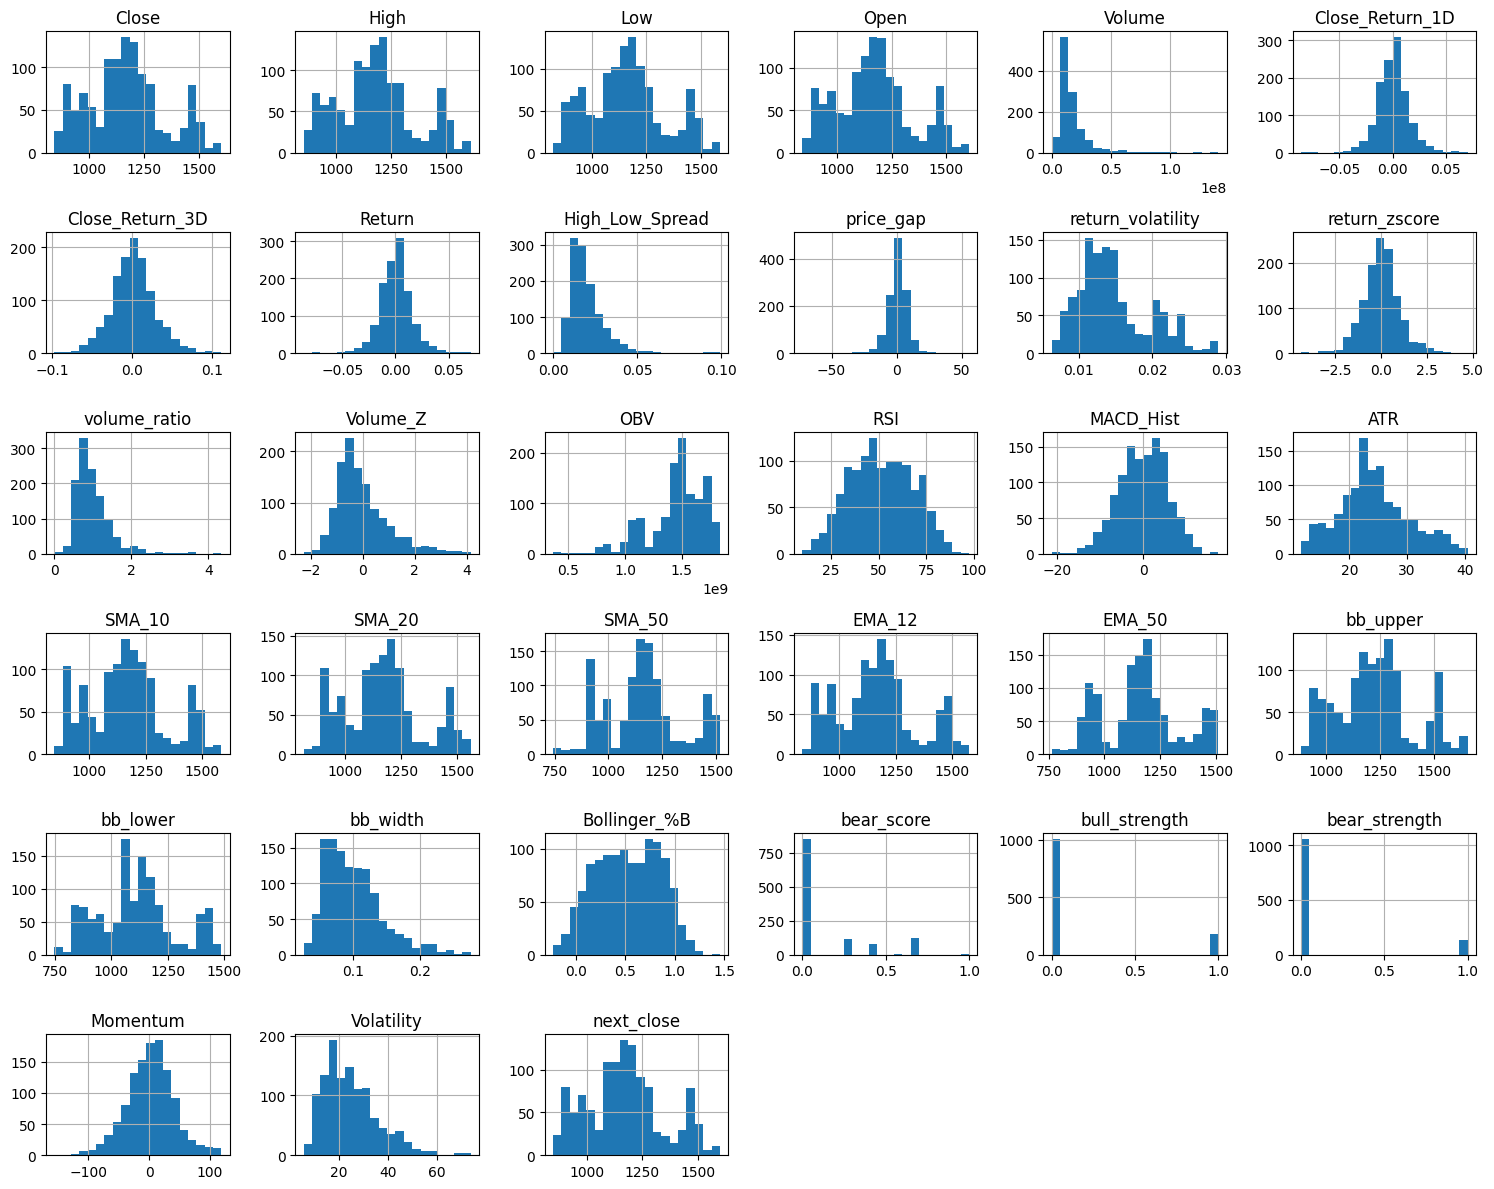

In [4]:
# Plot histograms for numerical columns
df.hist(bins=20, figsize=(15, 12))
plt.tight_layout()
plt.show()

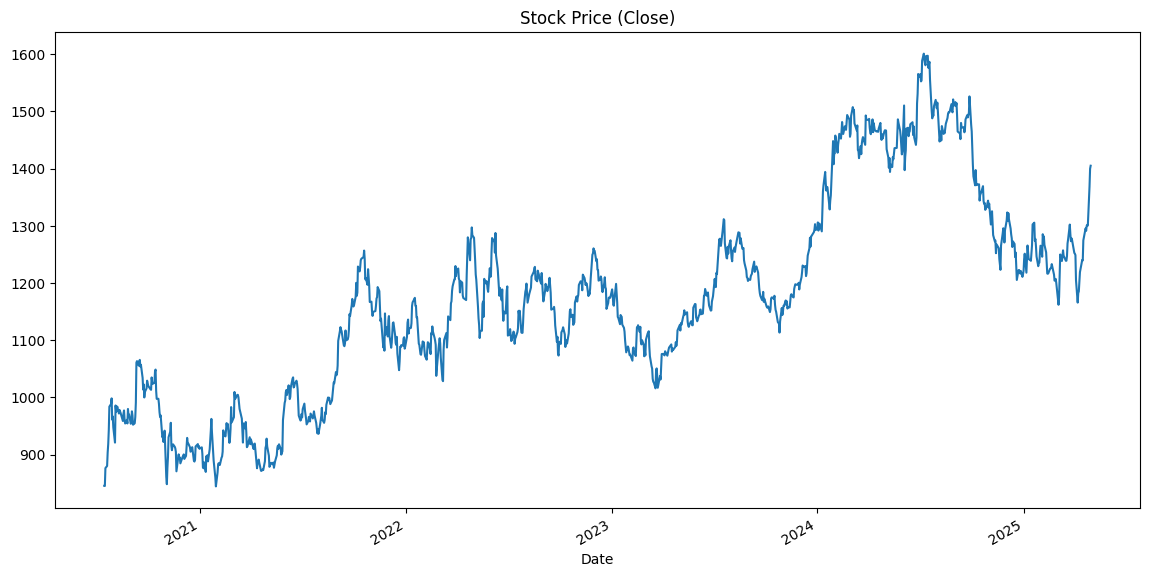

In [5]:
plt.figure(figsize=(14, 7))
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Plot stock prices (Close)
df['Close'].plot(figsize=(14,7), title="Stock Price (Close)")
plt.show()

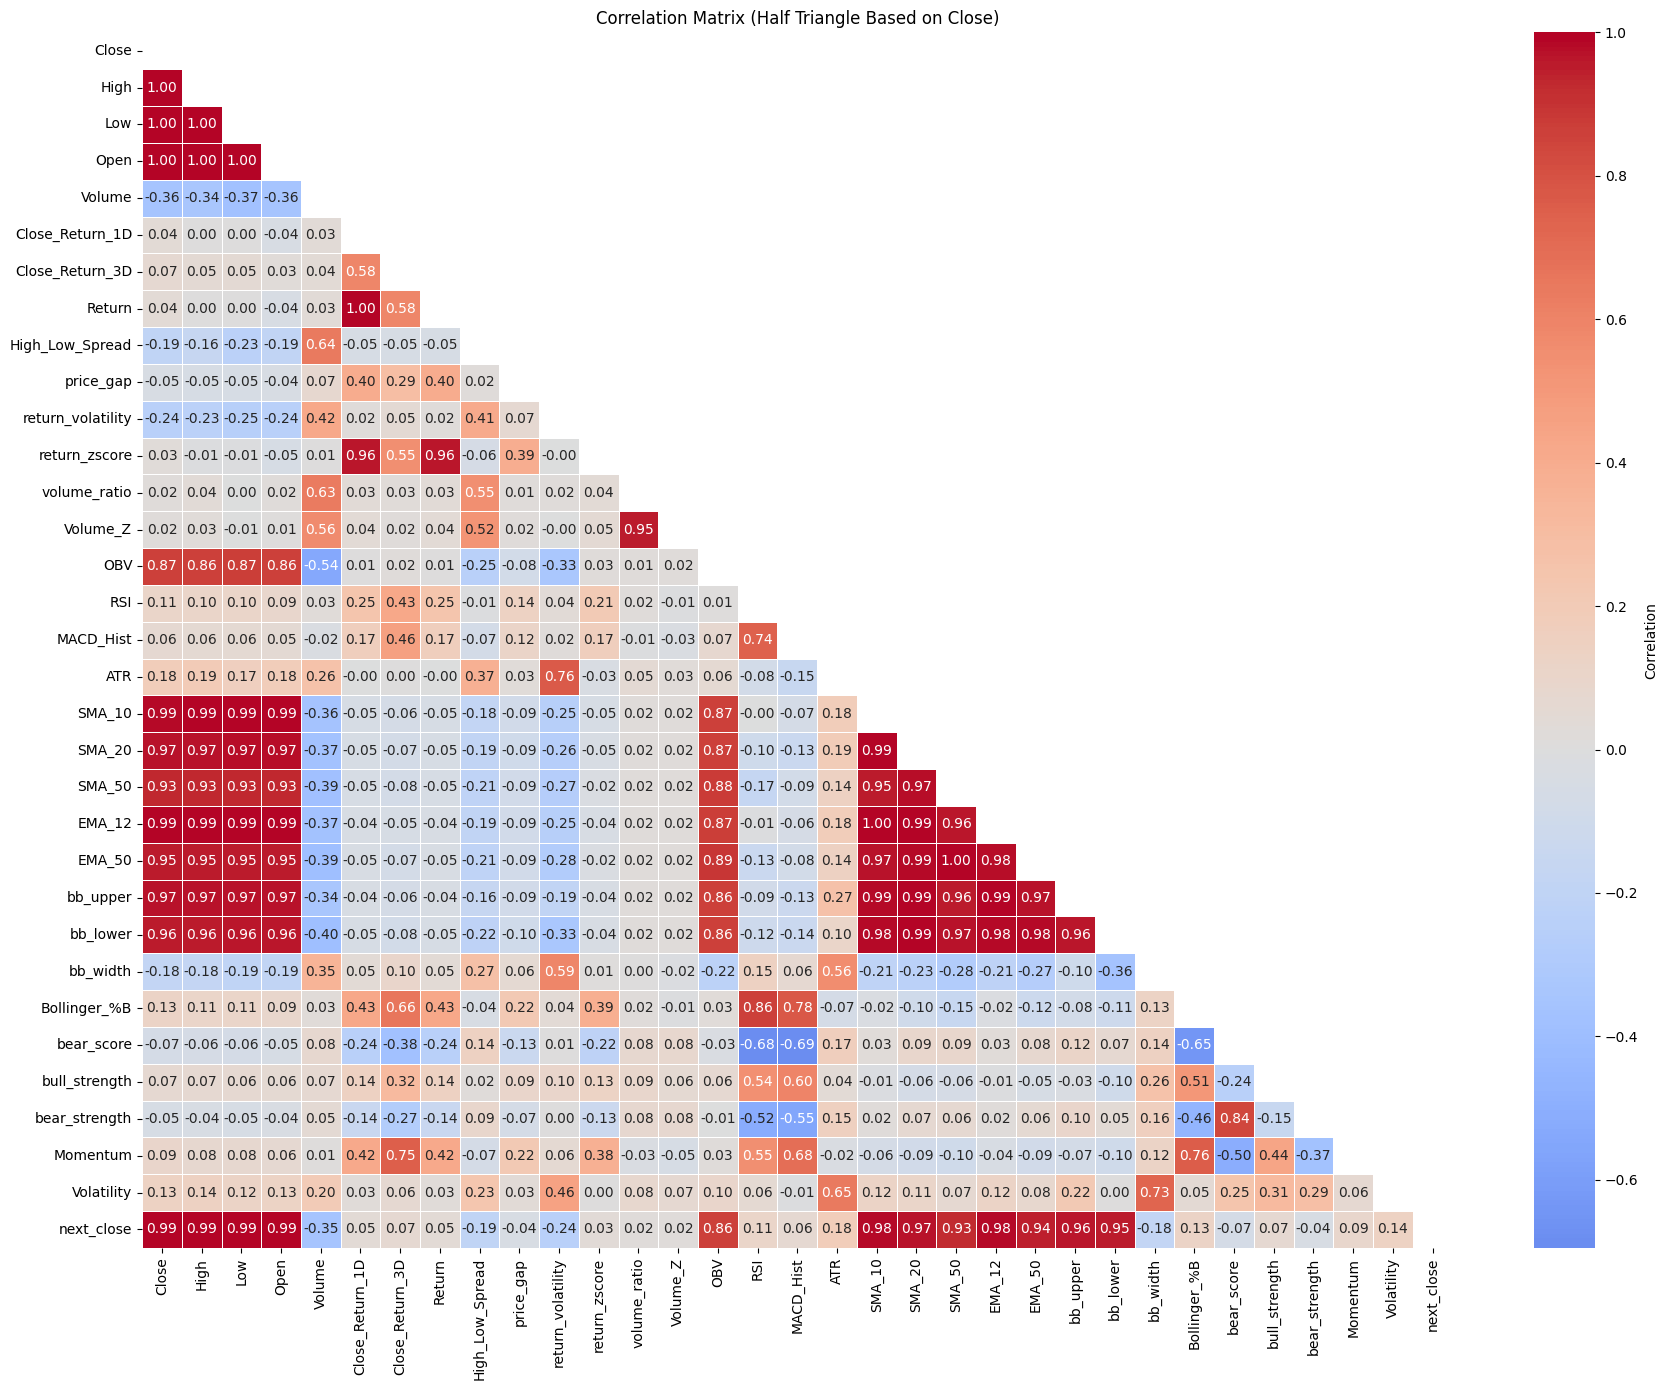

In [6]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

# Mask the upper triangle (for half triangle view)
mask_upper = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap for correlations based on "Close" price (upper triangle masked)
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True, fmt=".2f", linewidths=0.5, mask=mask_upper, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix (Half Triangle Based on Close)')
plt.tight_layout()
plt.show()

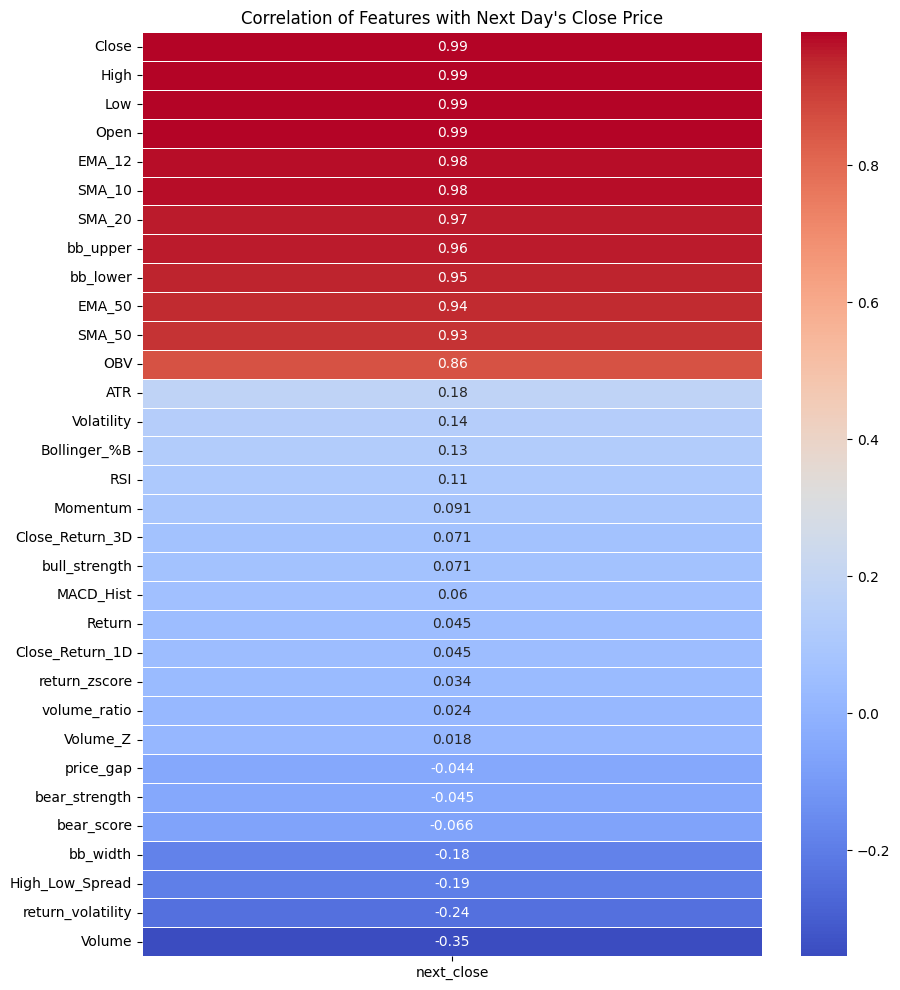

In [7]:
numeric_cols = df.select_dtypes(include='number').columns
correlations = df[numeric_cols].corr()['next_close'].sort_values(ascending=False)
plt.figure(figsize=(10, 12))
sns.heatmap(correlations.drop('next_close').to_frame(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation of Features with Next Day's Close Price")
plt.show()